#### In this section, we will
[A. Fit linear regression](#A.Set-the-baseline:-Linear-Regression) <br>
[B. Fit RidgeCV and Lasso CV with default parameters](#B.RidgeCV-or-LassoCV)<br>
[C. Residual Plot](#C.Residual-Plot)<br>
[D. Use selected model to predict test data](#D.Use-model-to-predict-test-data) <br>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pandas import Series
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

%matplotlib inline

/Users/chowmun/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
pd.options.display.max_columns =999 #dispaly the whole grid

#load and read the datasets
X_train = pd.read_csv('../datasets/X_train.csv')
y_train= pd.read_csv('../datasets/y_train.csv')
X_test = pd.read_csv('../datasets/X_test.csv')
y_test= pd.read_csv('../datasets/y_test.csv')

test_scaled = pd.read_csv('../datasets/test_scaled.csv')
test_id = pd.read_csv('../datasets/test_id.csv')
misc = pd.read_csv('../datasets/misc_value.csv')

#remove unnamed column
list =[X_train, y_train, X_test, y_test, test_scaled, test_id, misc]
for i in list:
    i.drop(['Unnamed: 0'], axis=1, inplace=True)
    

In [3]:
test_scaled.head(3)

,years_of_house,reno,g_finish,pconc,s_overall_q,kitchen_q,got_fplace,g_area,exter_q,total_area,ms__C (all),ms__FV,ms__I (all),ms__RH,ms__RL,ms__RM,nh_1,nh_2,nh_3,nh_4,nh_5,nh_6,nh_7,nh_8
0,1.950491,1.072901,-1.054636,-0.898245,-0.658550,-2.285434,-1.010439,0.013278,-0.687537,0.149241,-0.09935,-0.23257,-0.024723,-0.074352,-1.853730,2.317250,1.159859,-0.396094,-0.415495,-0.223679,-0.085934,-0.261797,-0.149953,-0.325701
1,-0.249214,-0.932052,0.948194,-0.898245,-0.658550,-0.774426,-1.010439,0.408387,-0.687537,0.445059,-0.09935,-0.23257,-0.024723,-0.074352,0.539453,-0.431546,1.159859,-0.396094,-0.415495,-0.223679,-0.085934,-0.261797,-0.149953,-0.325701
2,-1.201325,-0.932052,0.948194,1.113283,0.977332,0.736582,0.989669,-1.063866,1.022947,0.018924,-0.09935,-0.23257,-0.024723,-0.074352,0.539453,-0.431546,-0.862174,2.524653,-0.415495,-0.223679,-0.085934,-0.261797,-0.149953,-0.325701


### A.Set the baseline: Linear Regression

The test data provided has no target. In order for us to justify the model performance, we need to split the train dataset into sub train and sub test. 

In [4]:
lr = LinearRegression()

In [5]:
#train model using X_train and y_train
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Comparing the R^2 score for sub train and sub test datasets

In [6]:
lt = lr.score(X_train, y_train)
lt

0.8657361649236665

In [7]:
lp = lr.score(X_test, y_test)
lp

0.849233196902859

The R^2 result for X_train is higer than the X_test, it could be a sign of overfitting. 

In [8]:
#in statmodel, p>0.05 mean can be removed like lasso

In [9]:
# X = X_train
# X = sm.add_constant(X)
# y = y_train

# model = sm.OLS(y, X)
# model = model.fit()
# model.summary()
y=(lr.coef_).ravel()

In [10]:
lr_coefs = pd.DataFrame({'features': X_train.columns,
                         'coef': y,
                         'abs(coef)': np.abs(y)})
lr_coefs.sort_values('abs(coef)', inplace=True, ascending=False)
lr_coefs

,abs(coef),coef,features
9,32503.879827,32503.879827,total_area
4,13493.863719,13493.863719,s_overall_q
23,10556.197212,10556.197212,nh_8
5,9219.192624,9219.192624,kitchen_q
7,9113.488271,9113.488271,g_area
0,8570.370325,-8570.370325,years_of_house
8,6016.674802,6016.674802,exter_q
6,4637.112447,4637.112447,got_fplace
1,3508.680652,3508.680652,reno
19,3497.663839,3497.663839,nh_4


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]), <a list of 24 Text xticklabel objects>)

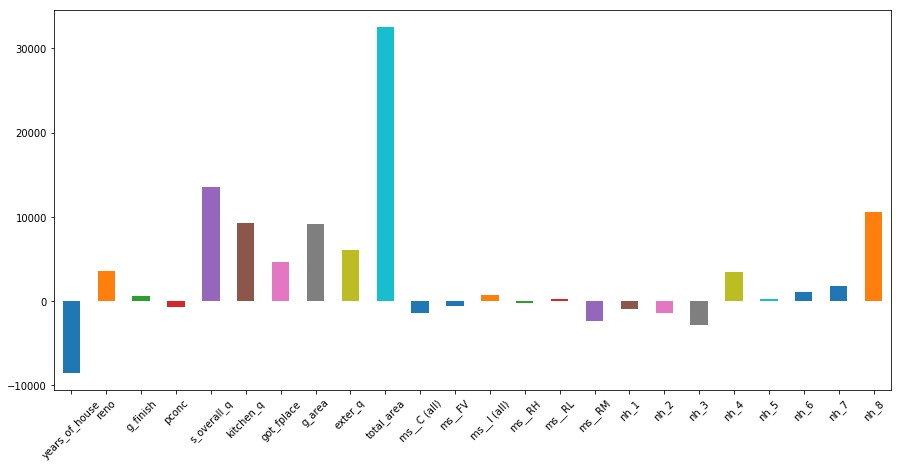

In [11]:
pd.Series(y, index=X_train.columns).plot.bar(figsize=(15, 7))
plt.xticks(rotation=45)

We can see that some features have a relative small coefficient  compare to total_area. It might be a sign that the features can be removed from the model to reduce its complexity. <br>
'total_area' has a relatively high coefficient compared to the rest. Well, logically prices of houses are heavily depend on the total area of a house. 

### B.RidgeCV or LassoCV
To increase the model performance, we will try using RidgeCV and LassoCV. 

#### B.i. RidgeCV

In [12]:
#create a list of lambda to fit in the RidgeCV
ridge_alphas = np.logspace(0, 5, 200)

In [13]:
#train the model
ridge = RidgeCV(alphas=ridge_alphas, cv=10)
ridge.fit(X_train, y_train)

RidgeCV(alphas=array([1.00000e+00, 1.05956e+00, ..., 9.43788e+04, 1.00000e+05]),
    cv=10, fit_intercept=True, gcv_mode=None, normalize=False,
    scoring=None, store_cv_values=False)

In [14]:
rt = ridge.score(X_train, y_train)
rt

0.8655483969408564

In [15]:
rp = ridge.score(X_test, y_test)
rp

0.8499912543125945

There is not much difference in the model performance when using linearRegression or RidgeCV. We will try on LassoCV instead.

#### B.ii.LassoCV

In [30]:
lasso = LassoCV(n_alphas=500, cv=10)

In [31]:
lasso.fit(X_train, y_train)

/Users/chowmun/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=500, n_jobs=None, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [32]:
#find the LassoCV performance:
lat = lasso.score(X_train, y_train)
lat

0.8655562692804677

In [33]:
lap = lasso.score(X_test, y_test)
lap

0.8500429115917775

In [34]:
#build a table for comparison
pd.DataFrame({'alg':['LinearRegression','RidgeCV','LassoCV'],
              'train_rscore': [lt,rt,lat],
              'test_rscore':[lp,rp,lap]})

,alg,test_rscore,train_rscore
0,LinearRegression,0.849233,0.865736
1,RidgeCV,0.849991,0.865548
2,LassoCV,0.850043,0.865556


LinearRegression, RidgeCV and LassoCV are comparable in thier R^2 score. I decide to choose LassoCV as it helps to zero out those features it deems unimportant. <br>
We will progress by getting the coefficient for each features.<br>
To make the result sounds more reality, we converted it into root mean square error(rmse).

In [35]:
pred = lasso.predict(X_test)
mean = mean_squared_error(y_test, pred) 
rmse = np.sqrt(mean_squared_error(y_test,pred))
print(rmse)

30939.76322097777


The predicted result is $31K diverted from the real sale price.<br>
Then we construct a table for the features and coefficients get from the model.

In [36]:
lasso_coef = pd.DataFrame({'features': X_train.columns,
                           'coefs': lasso.coef_,
                           'abs(coef)': np.abs(lasso.coef_)})
lasso_coef.sort_values('abs(coef)', inplace=True, ascending=False)
lasso_coef

,abs(coef),coefs,features
9,32474.110162,32474.110162,total_area
4,13442.782309,13442.782309,s_overall_q
23,10984.473854,10984.473854,nh_8
5,9244.997940,9244.997940,kitchen_q
7,9043.184452,9043.184452,g_area
0,7910.754273,-7910.754273,years_of_house
8,5959.446846,5959.446846,exter_q
6,4680.484008,4680.484008,got_fplace
19,3714.705768,3714.705768,nh_4
1,2970.791296,2970.791296,reno


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]), <a list of 24 Text xticklabel objects>)

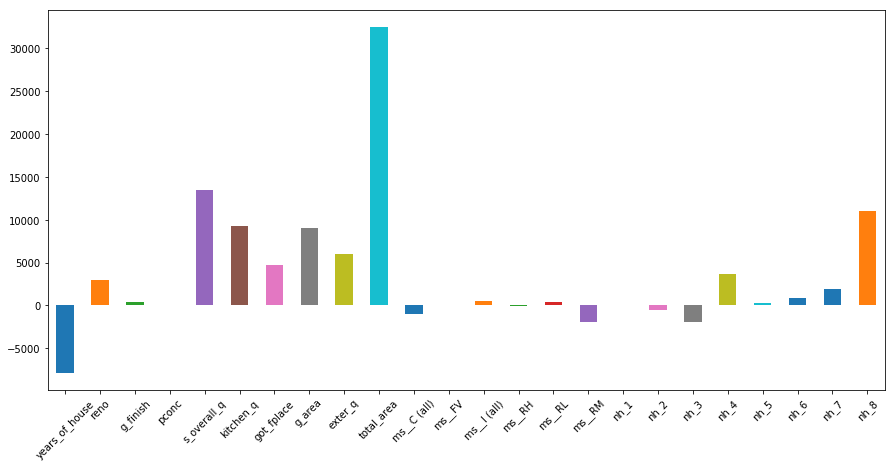

In [37]:
#then we visualised the coef using bargraph
pd.Series(lasso.coef_, index=X_train.columns).plot.bar(figsize=(15, 7))
plt.xticks(rotation=45)

Pretty much similar with the linear regression graph but with a few features have been zero out.<br>
From the plot, total house area, overall house quality and certain neighborhood are the important features contribute to the increase in house price. <br>
While, the years of house is definitely reduce the sale price. <br>
To further validate the model, we will plot a residual plot.

### C.Residual Plot

In [38]:
#form a dataframe for prediction of X_train and X_test
pred_train = pd.DataFrame(lasso.predict(X_train), columns=['pred_train'])
pred_test = pd.DataFrame(lasso.predict(X_test), columns=['pred_test'])

In [39]:
#in order to join with predicted price with sale price we need to reset the index to zero, so they will have a common index to join
#after reset_index, the original index will become a 'index' column, thus will need to drop it 
y_train = y_train.reset_index().drop('index', axis=1)
y_test = y_test.reset_index().drop('index', axis=1)

In [40]:
#join both 'SalePrice' and 'Predcit' columns then form a 'residual' using both the columns mentioned
df_train = pred_train.join(y_train)
df_train['residual_train']=df_train['SalePrice']-df_train['pred_train']
df_train.describe()

,pred_train,SalePrice,residual_train
count,1637.000000,1637.000000,1.637000e+03
mean,180471.200977,180471.200977,-3.431301e-12
std,73225.157602,79085.663818,2.899800e+04
min,-10304.225277,12789.000000,-1.582743e+05
25%,126171.570651,129500.000000,-1.558184e+04
50%,165131.473637,161000.000000,4.505187e+02
75%,224236.684028,213500.000000,1.436426e+04
max,450906.541850,584500.000000,1.695576e+05


In [41]:
#carry out the same operation of test data
df_test = pred_test.join(y_test)
df_test['residual_test']=df_test['SalePrice']-df_test['pred_test']
df_test.describe()

,pred_test,SalePrice,residual_test
count,410.000000,410.000000,410.000000
mean,185583.466531,184760.665854,-822.800677
std,76785.921677,79995.169024,30966.607868
min,30045.649513,66500.000000,-140036.127148
25%,131662.708225,130000.000000,-17037.078688
50%,169661.123700,164750.000000,729.333928
75%,224027.014944,214675.000000,15110.450520
max,432935.588458,611657.000000,200948.781185


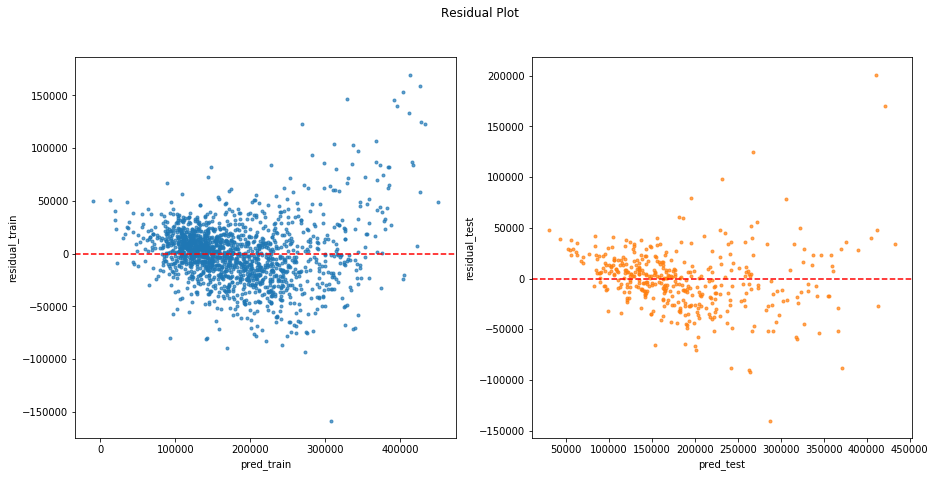

In [42]:
fig, [ax1, ax2] = plt.subplots(1,2, figsize=(15,7))
fig.suptitle('Residual Plot')
sns.regplot('pred_train', 'residual_train', data=df_train, fit_reg=False, scatter_kws={'marker':'o','alpha':0.7,'s':9}, ax=ax1)
ax1.axhline(y=0, color='red', linestyle='dashed')
sns.regplot('pred_test', 'residual_test', data=df_test, fit_reg=False, scatter_kws={'marker':'o','alpha':0.7,'s':9}, ax=ax2)
ax2.axhline(y=0, color='red', linestyle='dashed')

Both the residual plots for train and test data are pretty symmetrically distributed.<br>
Most of the points are cluster around zero, low error in prediction.<br>
The plot for test is a bit diverted from clustering around central, it could be due to low number of samples.<br>
There are a few outliers for both plots but overall the residuals appear to behave randomly, it suggests that the model fits the data well.

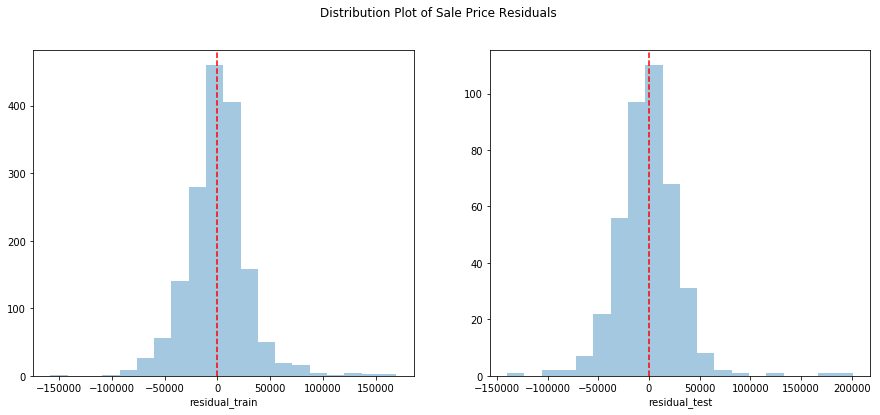

In [43]:
fig, [ax1, ax2] = plt.subplots(1,2, figsize=(15, 6))
fig.suptitle('Distribution Plot of Sale Price Residuals')
sns.distplot(df_train['residual_train'], bins=20, kde=False, ax=ax1)
ax1.axvline(x=0, color='red', linestyle='dashed')
sns.distplot(df_test['residual_test'], bins=20, kde=False, ax=ax2)
ax2.axvline(x=0, color='red', linestyle='dashed')

We could notice that the error follow  a normal distribution, this proves that the model choosen fit the data well.

### D.Use selected model to predict test data 

In [44]:
#use the seleceted model to predict the test_scaled data and store in preds

In [45]:
preds = lasso.predict(test_scaled)
preds2 = preds - misc['Misc Val']

In [46]:
#creata a dataframe to store the id and sale price, then save it as csv

In [47]:
solution = pd.DataFrame({'Id':test_id['Id'], 'SalePrice':preds})
solution.set_index('Id', inplace=True)
solution.to_csv('../datasets/sub_reg.csv')

In [48]:
solution2 = pd.DataFrame({'Id':test_id['Id'], 'SalePrice':preds2})
solution2.set_index('Id', inplace=True)
solution2.to_csv('../datasets/sub_reg2.csv')